## 检查 MMDetection 版本

In [1]:
# Check nvcc version
!nvcc -V

# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:49:14_PDT_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env
import mmdet

def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0: NVIDIA GeForce RTX 3080
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.99
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.0+cu117
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=c

# 加载训练好的模型预测

In [3]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = '../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/faster-rcnn_r50_fpn_1x_voc0712.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best*.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_result = inferencer(external_imgs, out_dir='./output_external_faster_rcnn', pred_score_thr=0.5)

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
test_result = inferencer(test_imgs, out_dir='./output_test_faster_rcnn', pred_score_thr=0.5)

Loads checkpoint by local backend from path: ../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best_pascal_voc_mAP_epoch_4.pth
05/30 08:30:12 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: 
The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(

/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: 
The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(

Output()

In [ ]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
# config = '../configs/yolo/yolov3_d53_8xb8-ms-608-273e_voc07_v2.py'
config = '../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/yolov3_d53_8xb8-ms-608-273e_coco_v3.py'
# Setup a checkpoint file to load
# checkpoint = glob.glob('../work_dirs/yolov3_d53_8xb8-ms-608-273e_voc07_v2/epoch_14.pth')[-1]
checkpoint = glob.glob('../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/best*.pth')[-1]
# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_result = inferencer(external_imgs, out_dir='./output_external_yolov3', pred_score_thr=0.3)

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
test_result = inferencer(test_imgs, out_dir='./output_test_yolov3', pred_score_thr=0.3)

Loads checkpoint by local backend from path: ../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/best_coco_bbox_mAP_epoch_31.pth


Output()

/usr/local/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:508: UserWarning: Warning: 
The text is out of bounds, the drawn text may not be in the image
  warnings.warn(

Output()

# 查看训练好的Faster R-CNN第一阶段产生的proposal box

In [ ]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = '../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/faster-rcnn_r50_fpn_1x_voc0712.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best*.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

model = inferencer.model
print(model)

Loads checkpoint by local backend from path: ../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/best_pascal_voc_mAP_epoch_4.pth
FasterRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

Output()

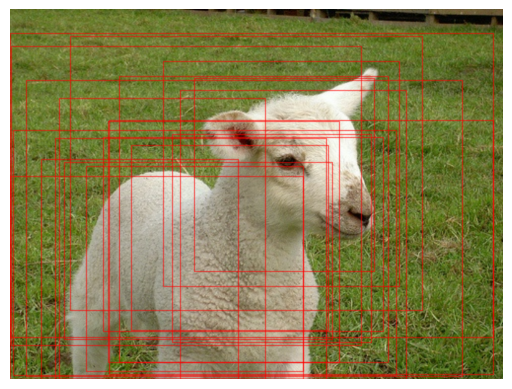

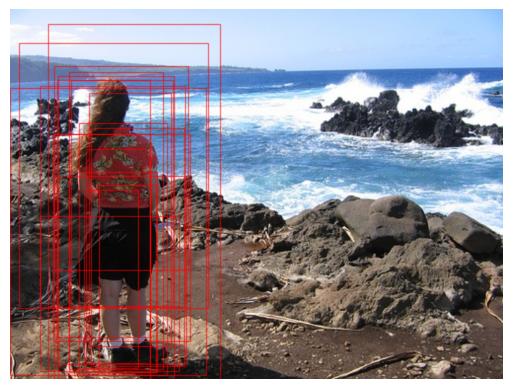

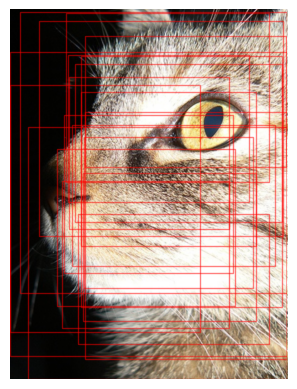

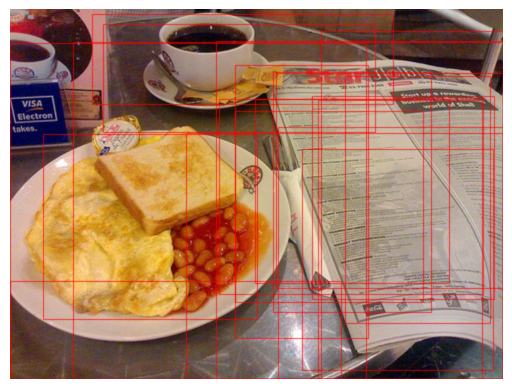

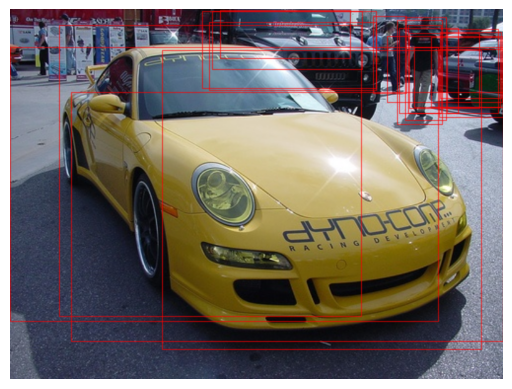

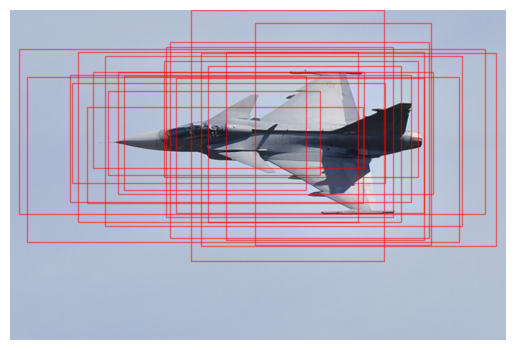

In [ ]:
from rich.progress import track
import matplotlib.pyplot as plt
import os
import cv2

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
inputs = test_imgs
batch_size = 1
kwargs = {}

(   preprocess_kwargs,
    forward_kwargs,
    visualize_kwargs,
    postprocess_kwargs,
) = inferencer._dispatch_kwargs(**kwargs)
ori_inputs = inferencer._inputs_to_list(inputs)
# Currently only supports bs=1
tokens_positive=None
tokens_positive = [tokens_positive] * len(ori_inputs)
inputs = inferencer.preprocess(
            ori_inputs, batch_size=batch_size, **preprocess_kwargs)
results_dict = {'predictions': [], 'visualization': []}
bboxes_list = []
for ori_imgs, data in (track(inputs, description='Inference')
                        if inferencer.show_progress else inputs):
    # preds = inferencer.forward(data, **forward_kwargs)
    # 1. 数据预处理
    preprocessed_x = model.data_preprocessor(data)

    # 2. 特征提取
    features = model.backbone(preprocessed_x['inputs'])

    # 3. 特征融合
    fused_features = model.neck(features)

    # 4. 区域提议网络
    rpn_outs = model.rpn_head(fused_features)

    losses, predictions=model.rpn_head.loss_and_predict(fused_features, preprocessed_x['data_samples'])
    bboxes = predictions[0]['bboxes'].cpu().numpy()
    bboxes_list.append(bboxes)
    
    # 可视化
    # plt.imshow(data['inputs'][0].cpu().numpy().transpose(1, 2, 0))
    plt.imshow(cv2.cvtColor(data['inputs'][0].cpu().numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB))
    for i in range(20):
        bbox = bboxes[i]
        plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='r', linewidth=1, alpha=0.5))
    # 保存图像
    # 不显示坐标轴
    plt.axis('off')
    output_path = 'test_proposal_bboxes/vis/{}'.format(os.path.basename(data['data_samples'][0].img_path))
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()
    # break

# 可视化训练图片的标签

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# 加载 COCO 格式的标注文件
with open('/hy-tmp/mmdetection/external_images/instances_val2017.json') as f:
    instances = json.load(f)
instances_df = pd.DataFrame(instances['annotations'])
# 获取选定图片的文件名列表
external_imgs = glob.glob('/hy-tmp/mmdetection/external_images/*.jpg')
external_imgs = [os.path.basename(img) for img in external_imgs]

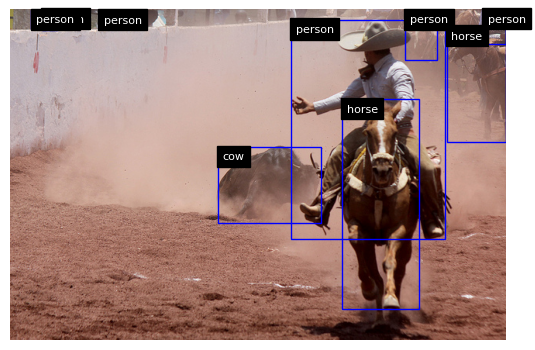

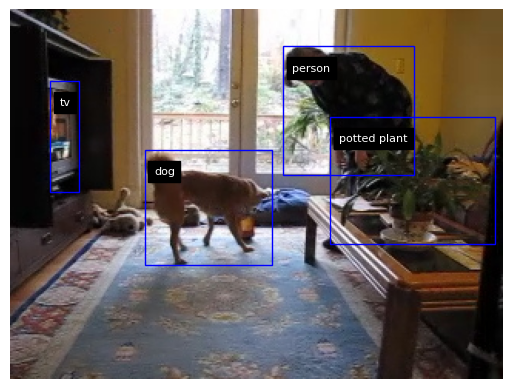

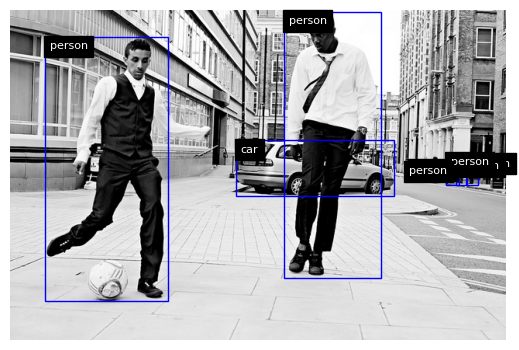

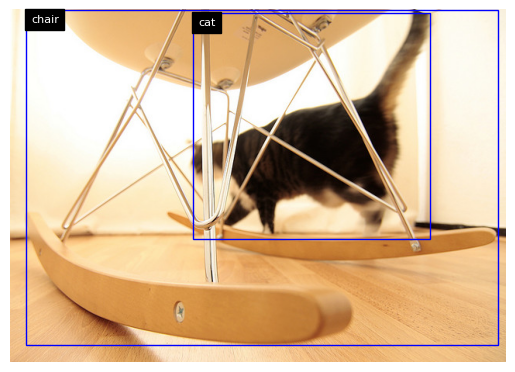

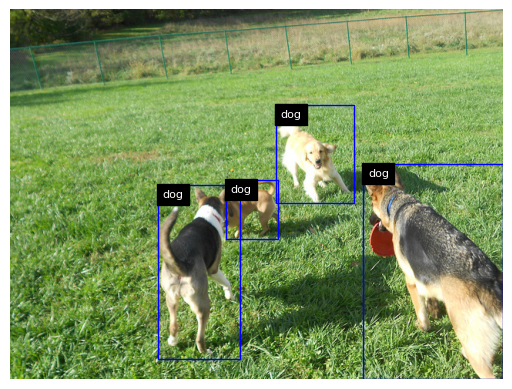

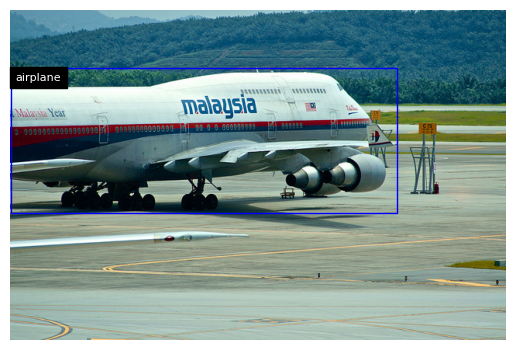

In [ ]:
import matplotlib.patches as patches
from PIL import Image

# 创建一个字典，用于快速查找文件名对应的图片ID
image_id_map = {img['file_name']: img['id'] for img in instances['images']}
cate_map = {cat['id']: cat['name'] for cat in instances['categories']}
for img_file in external_imgs:
    image_id = image_id_map.get(img_file)
    anno = instances_df[instances_df['image_id'] == image_id]
    img = Image.open(f'/hy-tmp/mmdetection/external_images/{img_file}')
    # plt.imshow(img)  # 显示图片
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for idx,  row in anno.iterrows(): 
        # 排除不在VOC中的类别
        if cate_map[row['category_id']] in ['teddy bear', 'tie', 'sports ball', 'frisbee']:
            continue
        xmin, ymin, width, height = row['bbox']
        # 创建一个矩形补丁
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor = 'b', facecolor='none')
        # 添加矩形补丁到图像中
        ax.add_patch(rect)
        # 添加类别标签
        plt.text(xmin + 6, ymin + 16, cate_map[row['category_id']], color='w', fontsize=8, bbox=dict(facecolor='black'))
    # plt.show()
    # 移除坐标轴
    ax.set_axis_off()

    # 保存图像
    output_path = f'external_gd/vis/{img_file}'
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()

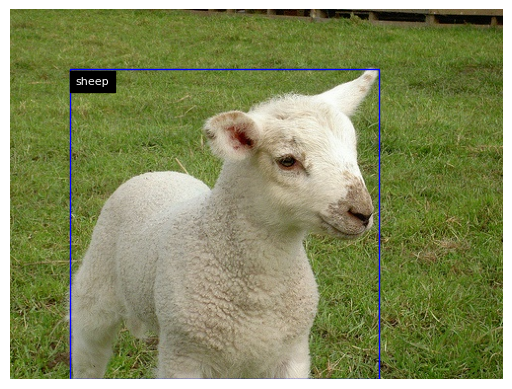

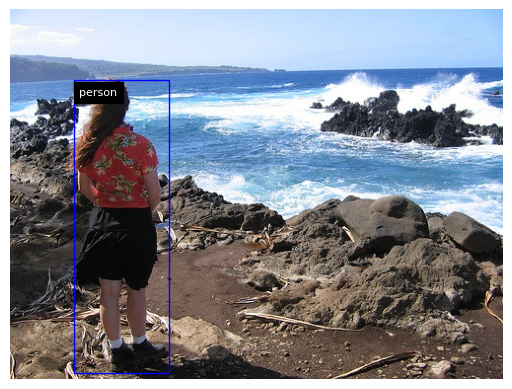

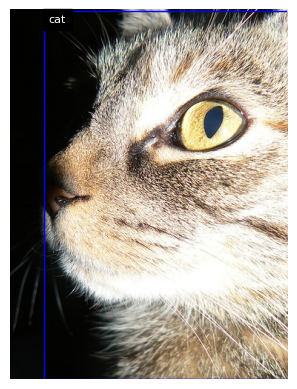

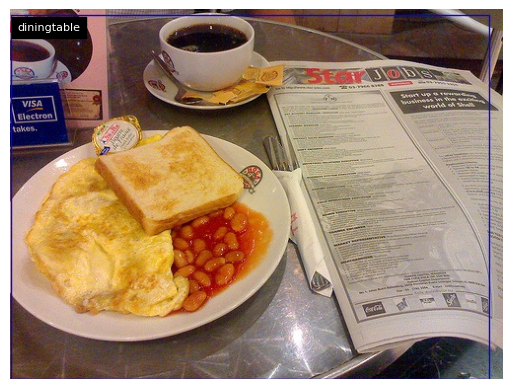

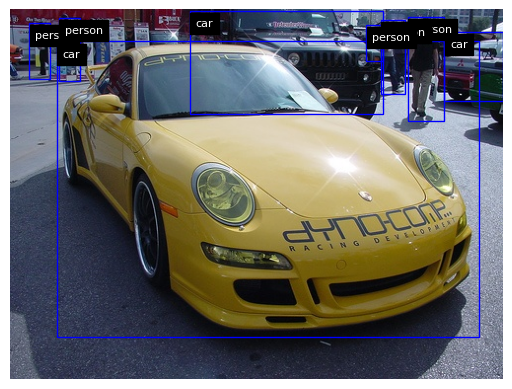

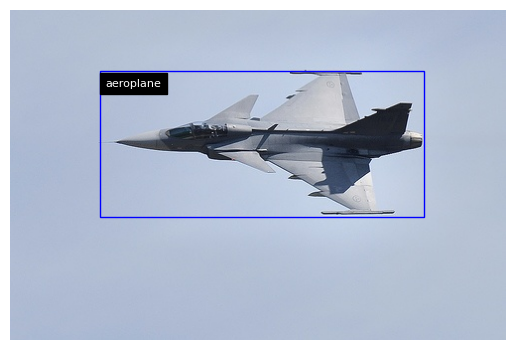

In [ ]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        boxes.append((xmin, ymin, xmax, ymax))
        labels.append(label)

    return boxes, labels

import matplotlib.patches as patches
from PIL import Image

test_imgs = glob.glob('/hy-tmp/mmdetection/test_raw/*.jpg')
for img_file in test_imgs:
    anno_path = os.path.join('/hy-tmp/datasets/VOCdevkit/VOC2007/Annotations/', os.path.basename(img_file).replace('.jpg', '.xml'))
    boxes, labels = parse_annotation(anno_path)
    # anno = instances_df[instances_df['image_id'] == image_id]
    img = Image.open(img_file)
    # plt.imshow(img)  # 显示图片
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for box, label in zip(boxes, labels):
        xmin, ymin, xmax, ymax = box
        width = xmax - xmin
        height = ymax - ymin
        # 创建一个矩形补丁
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='b', facecolor='none')
        # 添加矩形补丁到图像中
        ax.add_patch(rect)
        # 添加类别标签
        plt.text(xmin + 6, ymin + 16, label, color='w', fontsize=8, bbox=dict(facecolor='black'))
    
    # 移除坐标轴
    ax.set_axis_off()

    # 保存图像
    output_path = f'test_gd/vis/{os.path.basename(img_file)}'
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()

# 提取Tensorboard中的数据，并绘图

## Faster R-CNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

# 定义日志文件路径
log_file_yolov3 = '../work_dirs/faster-rcnn_r50_fpn_1x_voc0712/20240528_013100/vis_data'
event_acc_faster_rcnn = EventAccumulator(log_file_faster_rcnn).Reload()

# 提取 epoch, loss 和 accuracy 数据
epochs_train_faster_rcnn = [x.step for x in event_acc_faster_rcnn.Scalars('acc')]
acc_faster_rcnn = [x.value for x in event_acc_faster_rcnn.Scalars('acc')]
loss_faster_rcnn = [x.value for x in event_acc_faster_rcnn.Scalars('loss')]

epochs_val_faster_rcnn = [x.step for x in event_acc_faster_rcnn.Scalars('pascal_voc/AP50')]
AP50_faster_rcnn = [x.value for x in event_acc_faster_rcnn.Scalars('pascal_voc/AP50')]
mAP_faster_rcnn = [x.value for x in event_acc_faster_rcnn.Scalars('pascal_voc/mAP')]

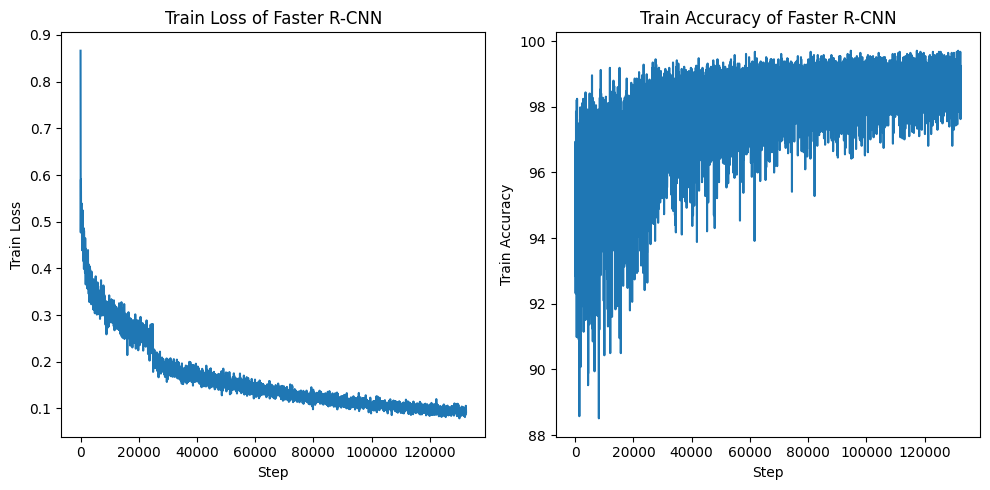

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_train_faster_rcnn, loss_faster_rcnn)
plt.xlabel('Step')
plt.ylabel('Train Loss')
plt.title('Train Loss of Faster R-CNN')

plt.subplot(1, 2, 2)
plt.plot(epochs_train_faster_rcnn, acc_faster_rcnn)
plt.xlabel('Step')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy of Faster R-CNN')

plt.tight_layout()
os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_faster_rcnn.png')
plt.show()
plt.close()

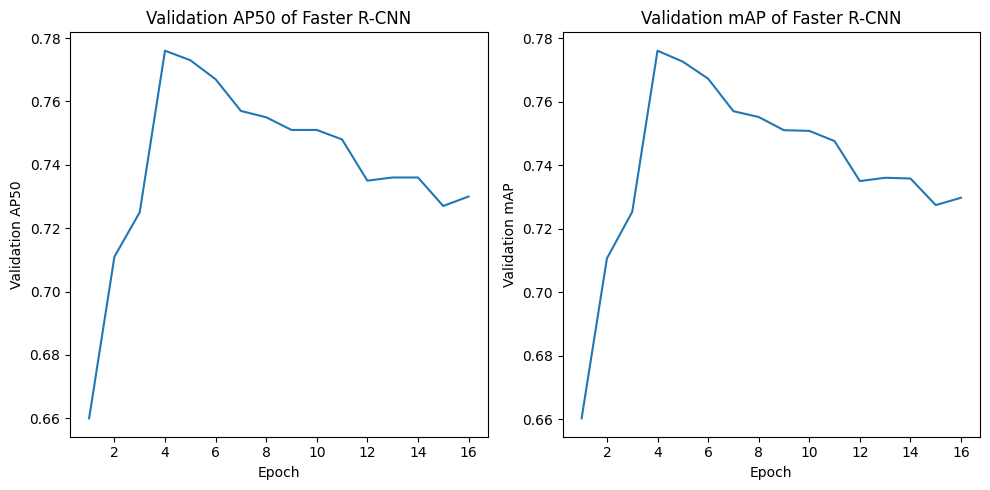

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_val_faster_rcnn, AP50_faster_rcnn)
plt.xlabel('Epoch')
plt.ylabel('Validation AP50')
plt.title('Validation AP50 of Faster R-CNN')

plt.subplot(1, 2, 2)
plt.plot(epochs_val_faster_rcnn, mAP_faster_rcnn)
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.title('Validation mAP of Faster R-CNN')

plt.tight_layout()
os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/map_faster_rcnn.png')
plt.show()
plt.close()

## YOLOv3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

# 定义日志文件路径
log_file_yolov3 = '../work_dirs/yolov3_d53_8xb8-ms-608-273e_coco_v3/20240529_091924/vis_data'
event_acc_yolov3 = EventAccumulator(log_file_yolov3).Reload()

# 提取 epoch, loss 和 accuracy 数据
epochs_train_yolov3 = [x.step for x in event_acc_yolov3.Scalars('loss')]
# acc_yolov3 = [x.value for x in event_acc_faster_rcnn.Scalars('acc')]
loss_yolov3 = [x.value for x in event_acc_yolov3.Scalars('loss')]
loss_cls_yolov3 = [x.value for x in event_acc_yolov3.Scalars('loss_cls')]
loss_conf_yolov3 = [x.value for x in event_acc_yolov3.Scalars('loss_conf')]
loss_xy_yolov3 = [x.value for x in event_acc_yolov3.Scalars('loss_xy')]
loss_wh_yolov3 = [x.value for x in event_acc_yolov3.Scalars('loss_wh')]

epochs_val_yolov3 = [x.step for x in event_acc_yolov3.Scalars('coco/bbox_mAP')]
bbox_mAP_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP')]
bbox_mAP_50_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP_50')]
bbox_mAP_75_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP_75')]
bbox_mAP_small_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP_s')]
bbox_mAP_medium_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP_m')]
bbox_mAP_large_yolov3 = [x.value for x in event_acc_yolov3.Scalars('coco/bbox_mAP_l')]

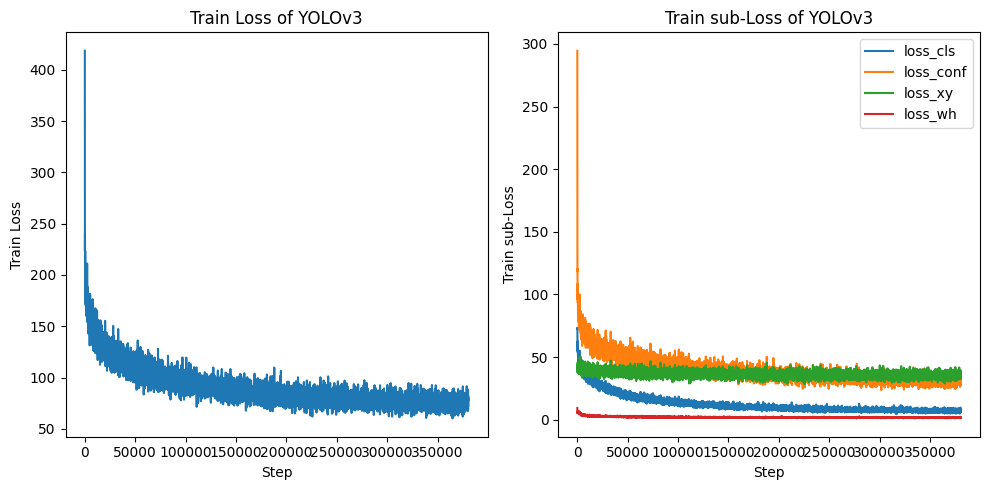

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_train_yolov3, loss_yolov3)
plt.xlabel('Step')
plt.ylabel('Train Loss')
plt.title('Train Loss of YOLOv3')

plt.subplot(1, 2, 2)
plt.plot(epochs_train_yolov3, loss_cls_yolov3, label='loss_cls')
plt.plot(epochs_train_yolov3, loss_conf_yolov3, label='loss_conf')
plt.plot(epochs_train_yolov3, loss_xy_yolov3, label='loss_xy')
plt.plot(epochs_train_yolov3, loss_wh_yolov3, label='loss_wh')
plt.xlabel('Step')
plt.ylabel('Train sub-Loss')
plt.legend()
plt.title('Train sub-Loss of YOLOv3')

plt.tight_layout()
os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_yolov3.png')
plt.show()
plt.close()

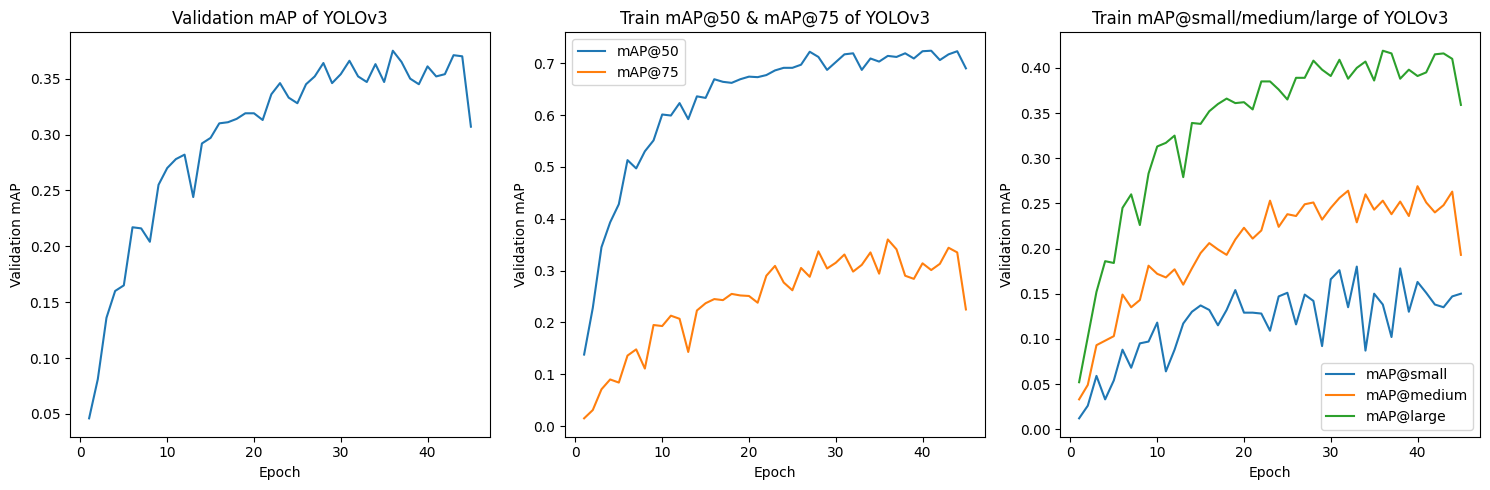

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs_val_yolov3, bbox_mAP_yolov3)
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.title('Validation mAP of YOLOv3')

plt.subplot(1, 3, 2)
plt.plot(epochs_val_yolov3, bbox_mAP_50_yolov3, label='mAP@50')
plt.plot(epochs_val_yolov3, bbox_mAP_75_yolov3, label='mAP@75')
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.legend()
plt.title('Train mAP@50 & mAP@75 of YOLOv3')

plt.subplot(1, 3, 3)
plt.plot(epochs_val_yolov3, bbox_mAP_small_yolov3, label='mAP@small')
plt.plot(epochs_val_yolov3, bbox_mAP_medium_yolov3, label='mAP@medium')
plt.plot(epochs_val_yolov3, bbox_mAP_large_yolov3, label='mAP@large')
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.legend()
plt.title('Train mAP@small/medium/large of YOLOv3')

plt.tight_layout()
os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/map_yolov3.png')
plt.show()
plt.close()